<a href="https://colab.research.google.com/github/Hanzamas/Hanzamas/blob/main/Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.filters import gaussian, sobel
from skimage.restoration import denoise_bilateral
from PIL import Image
from google.colab import files
from numpy import expand_dims
!pip install --upgrade tensorflow  # Ensure TensorFlow is up-to-date
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Upload image
uploaded = files.upload()  # Ini akan memunculkan dialog untuk memilih file gambar
image_path = list(uploaded.keys())[0]  # Mengambil nama file yang diupload
print("Path gambar:", image_path)

Saving WhatsApp Image 2024-09-05 at 08.38.16_4be29a2e.jpg to WhatsApp Image 2024-09-05 at 08.38.16_4be29a2e.jpg
Path gambar: WhatsApp Image 2024-09-05 at 08.38.16_4be29a2e.jpg


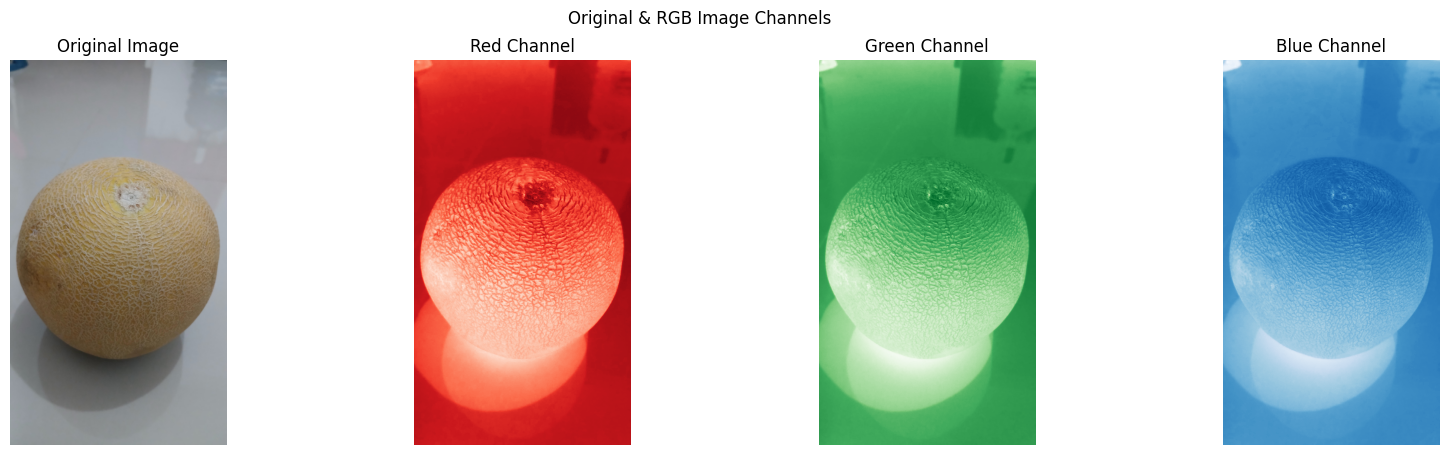

In [ ]:
# Membaca gambar setelah diupload
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if image is None:
    print("Error: Gambar tidak ditemukan atau gagal dibaca.")
else:
    # Plotting the original image and the RGB channels
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Original image
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(image[:, :, 0], cmap='Reds')  # Red channel
    plt.title('Red Channel')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(image[:, :, 1], cmap='Greens')  # Green channel
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(image[:, :, 2], cmap='Blues')  # Blue channel
    plt.title('Blue Channel')
    plt.axis('off')

    plt.suptitle('Original & RGB Image Channels')
    plt.show()

Text(0.5, 1.0, 'Resized')

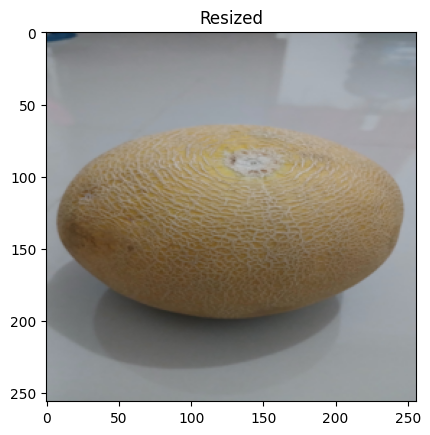

In [ ]:
    # Resize
    image_pil = Image.open(image_path)
    resized_image = image_pil.resize((256, 256))  # Resize to 256x256 pixels
    resized_array = np.array(resized_image)
    plt.imshow(resized_array)
    plt.title('Resized')

Text(0.5, 1.0, 'Grayscale')

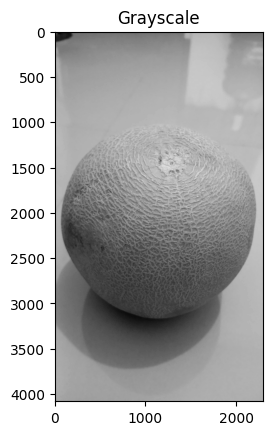

In [ ]:
    # Grayscale Conversion
    gray_image = image_pil.convert('L')  # Convert to grayscale
    gray_array = np.array(gray_image)
    plt.imshow(gray_array, cmap='gray')
    plt.title('Grayscale')

Text(0.5, 1.0, 'Contrast Enhanced')

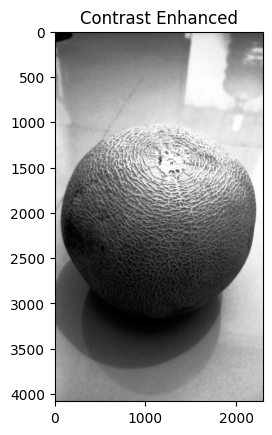

In [ ]:
    # Contrast Enhancement
    equalized_image = exposure.equalize_hist(gray_array)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Contrast Enhanced')

Text(0.5, 1.0, 'Noise Reduced')

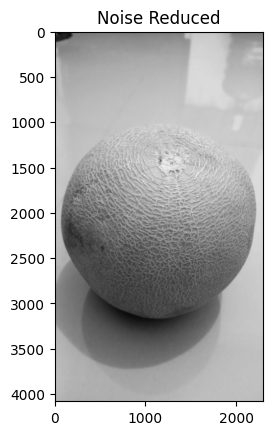

In [ ]:
    # Noise Reduction (Gaussian Blur)
    blurred_image = gaussian(gray_array, sigma=1)  # Adjust sigma for blur intensity
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Noise Reduced')

Text(0.5, 1.0, 'Dark Image')

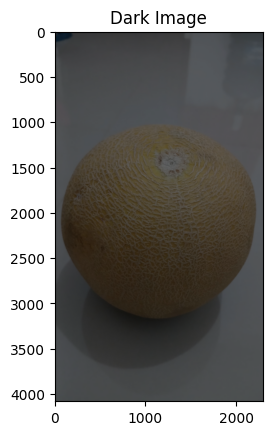

In [ ]:
    # Dark Image (simulasi citra gelap)
    dark_img = cv2.addWeighted(image, 0.5, np.zeros(image.shape, image.dtype), 0.5, 0)
    plt.imshow(cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB))
    plt.title('Dark Image')

Text(0.5, 1.0, 'Excessive Light')

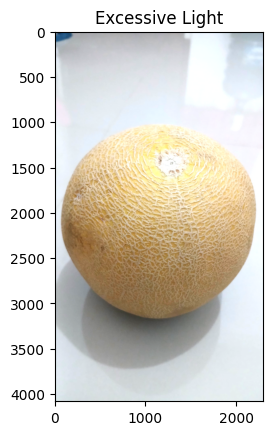

In [ ]:
    # Excessive Light (simulasi citra terlalu terang)
    light_img = cv2.addWeighted(image, 1.5, np.zeros(image.shape, image.dtype), 0, 0)
    plt.imshow(cv2.cvtColor(light_img, cv2.COLOR_BGR2RGB))
    plt.title('Excessive Light')

Text(0.5, 1.0, 'Noisy Image')

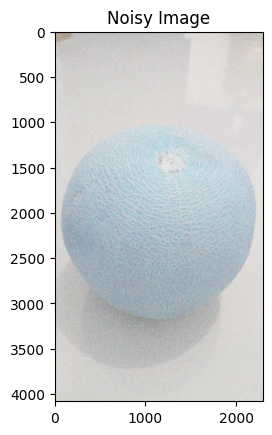

In [ ]:
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
    noisy_img = cv2.add(image, noise)
    plt.imshow(noisy_img)
    plt.title('Noisy Image')

Text(0.5, 1.0, 'Grey Image')

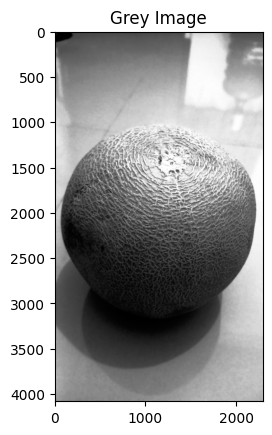

In [ ]:

    hist_eq = cv2.equalizeHist(gray_array)
    color_img = cv2.cvtColor(hist_eq, cv2.COLOR_GRAY2BGR)
    plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
    plt.title('Grey Image')

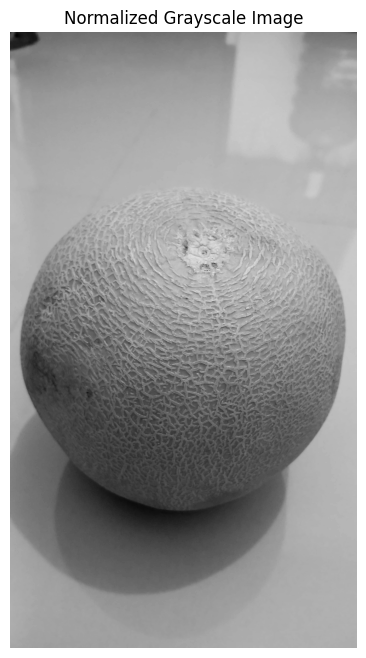

In [ ]:
    # Convert to grayscale and normalize
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    plt.figure(figsize=(8, 8))
    plt.imshow(norm_image, cmap='gray')
    plt.title('Normalized Grayscale Image')
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


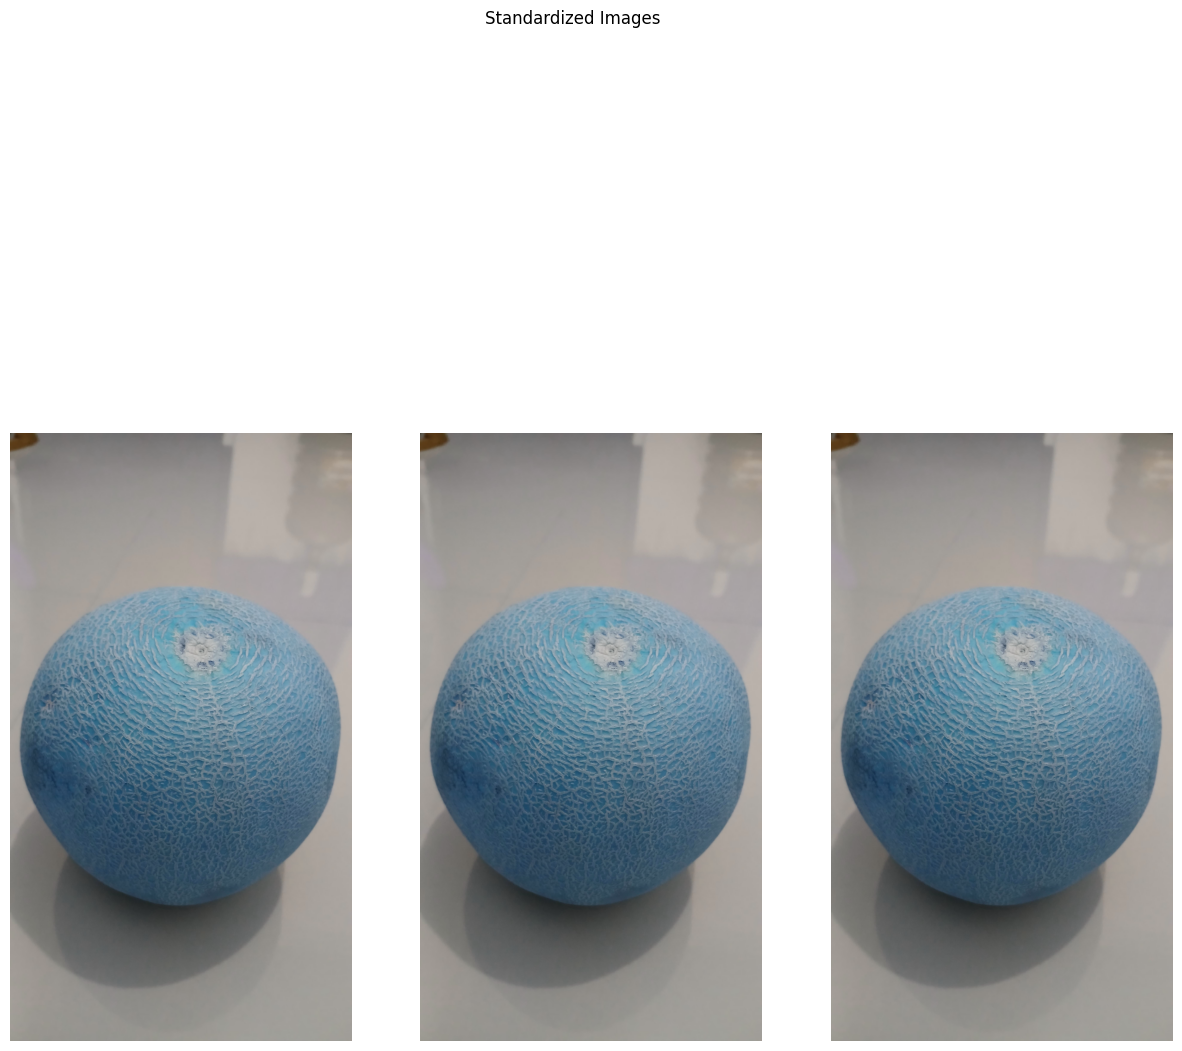

In [ ]:
    # Convert image to numpy array
    data = img_to_array(image)

    # Expand dimension to one sample
    samples = expand_dims(data, 0)

    # ImageDataGenerator for standardization
    datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
    it = datagen.flow(samples, batch_size=1)
    fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
    for i in range(3):
        images = next(it)[0].astype('uint8')
        im[i].imshow(images)
        im[i].axis('off')
    plt.suptitle('Standardized Images')
    plt.show()

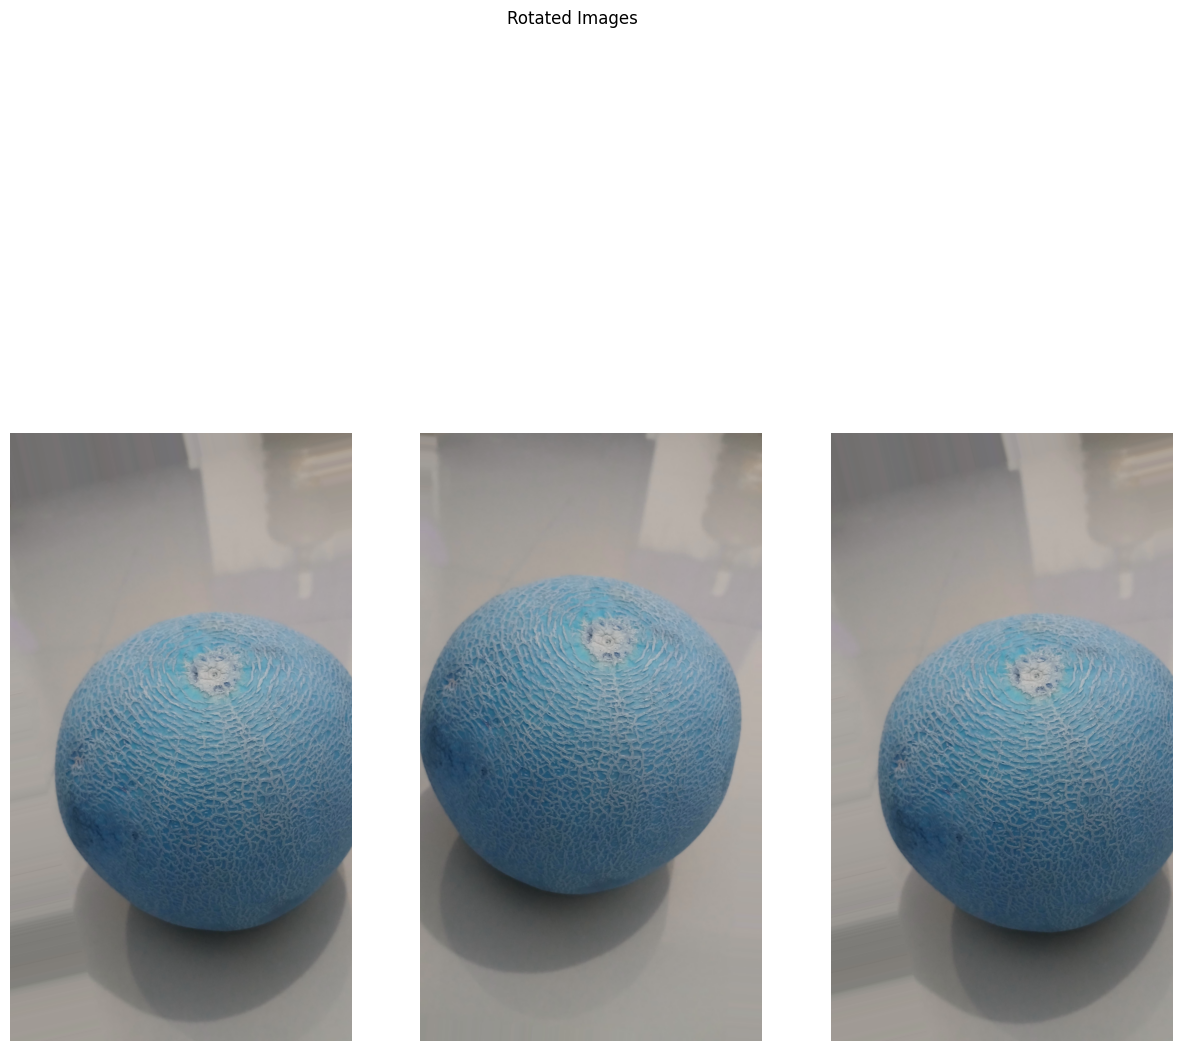

In [ ]:
    # ImageDataGenerator for rotation
    datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
    it = datagen.flow(samples, batch_size=1)
    fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
    for i in range(3):
        images = next(it)[0].astype('uint8')
        im[i].imshow(images)
        im[i].axis('off')
    plt.suptitle('Rotated Images')
    plt.show()

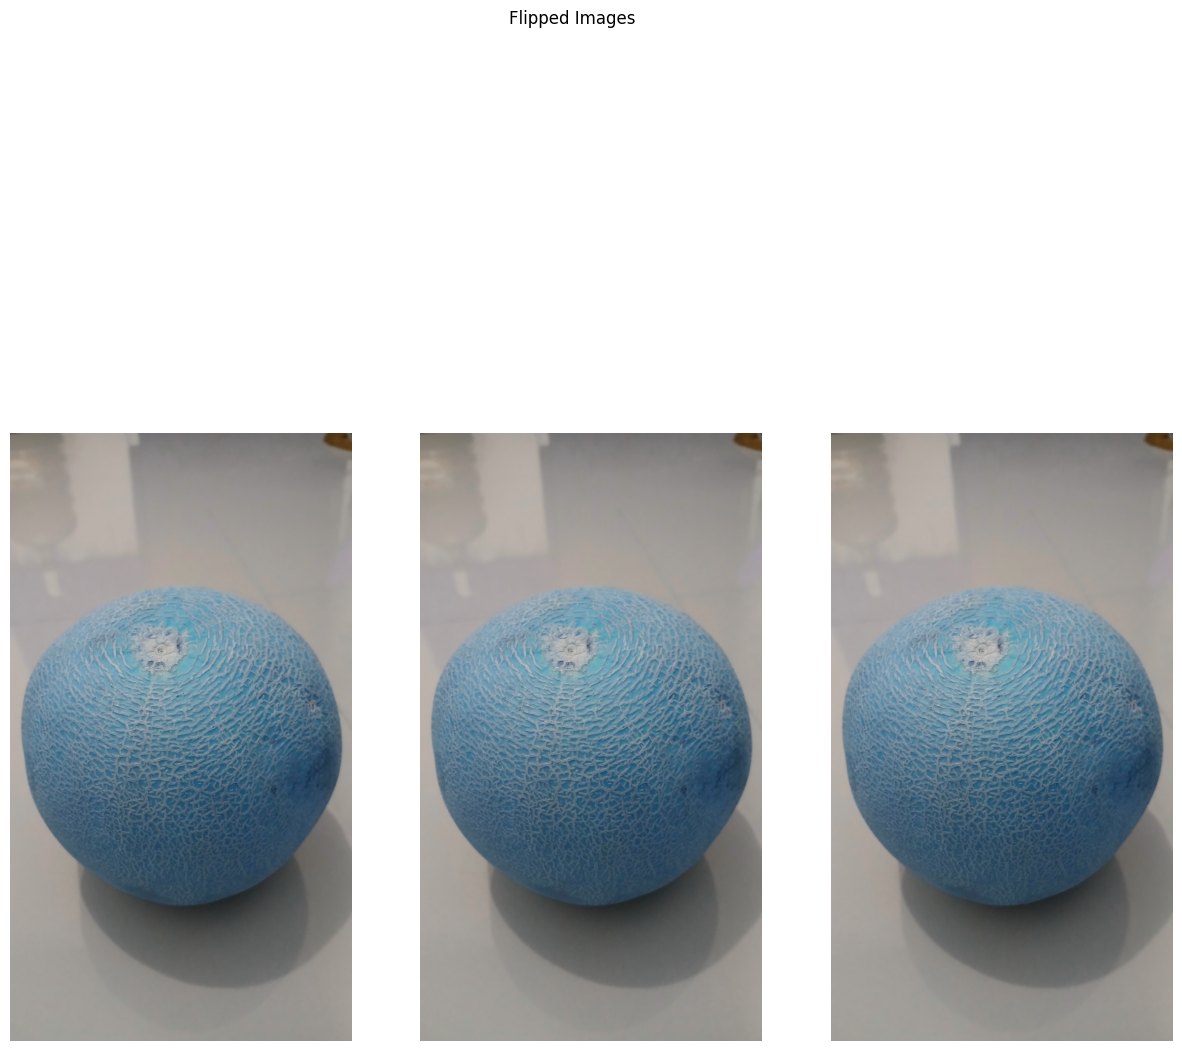

In [ ]:
    # ImageDataGenerator for flipping
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    it = datagen.flow(samples, batch_size=1)
    fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
    for i in range(3):
        images = next(it)[0].astype('uint8')
        im[i].imshow(images)
        im[i].axis('off')
    plt.suptitle('Flipped Images')
    plt.show()

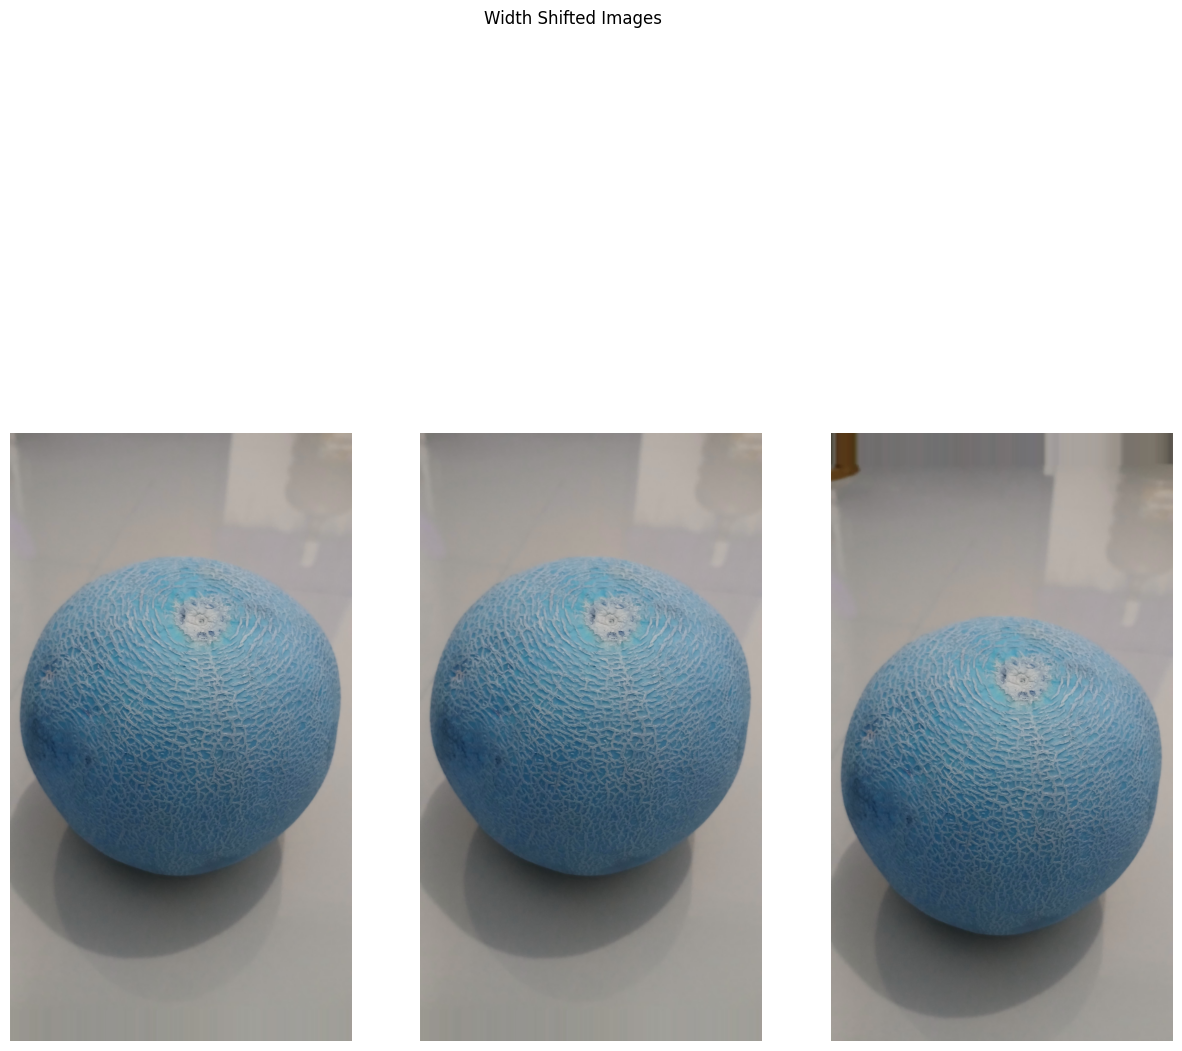

In [ ]:
    # ImageDataGenerator for width shift
    datagen = ImageDataGenerator(width_shift_range=[-200, 200])
    it = datagen.flow(samples, batch_size=1)
    fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
    for i in range(3):
        images = next(it)[0].astype('uint8')
        im[i].imshow(images)
        im[i].axis('off')
    plt.suptitle('Width Shifted Images')
    plt.show()